In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import optuna
data=pd.read_csv('train.csv')

In [85]:
data=pd.read_csv('train.csv')
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [86]:
data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [87]:
features_to_drop=['state']

In [88]:
data.drop(features_to_drop,axis=1,inplace=True)

In [49]:
##Scaling the data
scaler = StandardScaler()
for i in data.columns:
    if data[i].dtype in ['int64', 'float64']:
        data[i] = scaler.fit_transform(data[[i]])
        

In [89]:
##One hot encoding and replace binary categorical values with 1 and 0

pd.set_option('future.no_silent_downcasting', True)
data.replace({'yes': 1, 'no': 0}, inplace=True)
data=data.infer_objects()
data=pd.get_dummies(data, columns=[i for i in data.columns if data[i].dtype not in ['int64', 'float64']])
data.replace({False: 0, True: 1}, inplace=True)
churn = data['churn']
data.drop('churn', axis=1, inplace=True)
data['churn'] = churn

In [90]:
data

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,churn
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,1,0,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,1,0,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,1,0,0,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,1,0,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,118,9.57,7.5,7,2.03,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,188.3,70,32.01,243.8,88,20.72,...,79,9.62,10.3,6,2.78,0,0,1,0,0
4246,73,0,0,0,177.9,89,30.24,131.2,82,11.15,...,89,8.38,11.5,6,3.11,3,1,0,0,0
4247,75,0,0,0,170.7,101,29.02,193.1,126,16.41,...,104,5.81,6.9,7,1.86,1,1,0,0,0
4248,50,0,1,40,235.7,127,40.07,223.0,126,18.96,...,116,13.39,9.9,5,2.67,2,1,0,0,0


In [91]:
## Converting DF to numpy array 
data_np=np.array(data)
X=data_np[:,:-1]
y=data_np[:,-1]

In [92]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit_transform(X)

selector.variances_

array([2.42000000e+02, 8.44946159e-02, 1.93187875e-01, 5.20000000e+01,
       3.51500000e+02, 1.65000000e+02, 5.97600000e+01, 3.59300000e+02,
       1.70000000e+02, 1.82389594e+01, 3.95000000e+02, 1.75000000e+02,
       5.13319356e+00, 7.61636903e+00, 6.06528199e+00, 5.55198539e-01,
       1.71945323e+00, 1.90234131e-01, 2.49984000e-01, 1.86732955e-01])

In [70]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

In [71]:
X=X_pca

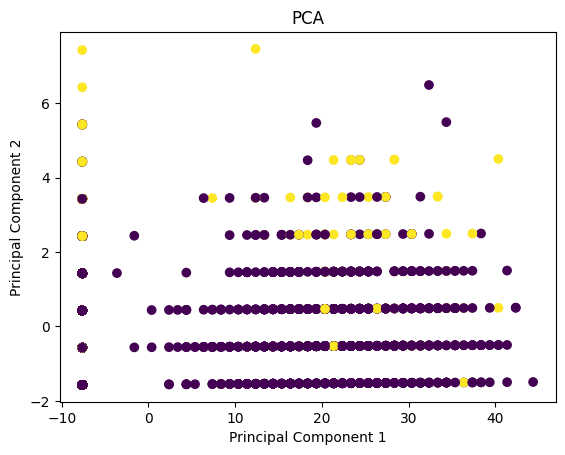

In [72]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()


In [73]:
# ## Over sampling using SMOTE
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='minority')
# X_sm, y_sm = smote.fit_resample(X, y)


In [78]:
## Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [79]:
##Define the objective function for Random Forest

from sklearn.ensemble import RandomForestClassifier


def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)

    clf=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=69)
    clf.fit(X_train, y_train)
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [80]:
##Optimizing the Random Forest model, find the best hyperparameters

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=15)


[I 2024-05-21 10:04:29,135] A new study created in memory with name: no-name-bd4c34bb-b67e-4654-b36c-fc9d28b7c8d1
[I 2024-05-21 10:04:29,258] Trial 0 finished with value: 0.8717647058823529 and parameters: {'n_estimators': 130, 'max_depth': 14, 'min_samples_split': 16}. Best is trial 0 with value: 0.8717647058823529.
[I 2024-05-21 10:04:29,283] Trial 1 finished with value: 0.8741176470588236 and parameters: {'n_estimators': 31, 'max_depth': 3, 'min_samples_split': 3}. Best is trial 1 with value: 0.8741176470588236.
[I 2024-05-21 10:04:29,365] Trial 2 finished with value: 0.8741176470588236 and parameters: {'n_estimators': 95, 'max_depth': 13, 'min_samples_split': 6}. Best is trial 1 with value: 0.8741176470588236.
[I 2024-05-21 10:04:29,446] Trial 3 finished with value: 0.8717647058823529 and parameters: {'n_estimators': 98, 'max_depth': 18, 'min_samples_split': 15}. Best is trial 1 with value: 0.8741176470588236.
[I 2024-05-21 10:04:29,474] Trial 4 finished with value: 0.8729411764705

In [81]:
##Train the model with the best hyperparameters

best_params=study_rf.best_params
n_estimators=best_params['n_estimators']
max_depth=best_params['max_depth']
min_samples_split=best_params['min_samples_split']

clf_rf=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=69)
clf_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, min_samples_split=3, n_estimators=31,
                       random_state=69)

In [82]:
##Define the objective function for Neural Network with 1 hidden layer
from sklearn.neural_network import MLPClassifier
def objective_mlp(trial):
    hidden_layer_sizes = trial.suggest_int('hidden_layer_sizes', 10, 150)
  
    alpha = trial.suggest_float('alpha', 0.001, 0.5)

    from sklearn.neural_network import MLPClassifier
    clf=MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', alpha=alpha, random_state=69)
    clf.fit(X_train, y_train)
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [83]:
##Optimizing the Neural Network model, find the best hyperparameters
study_nn=optuna.create_study(direction='maximize')
study_nn.optimize(objective_mlp, n_trials=10)

[I 2024-05-21 10:04:40,289] A new study created in memory with name: no-name-b32ecdaa-f35e-47f5-82d7-0ca50e5a1ac0
[I 2024-05-21 10:04:40,563] Trial 0 finished with value: 0.8705882352941177 and parameters: {'hidden_layer_sizes': 39, 'alpha': 0.2029620835791172}. Best is trial 0 with value: 0.8705882352941177.
[I 2024-05-21 10:04:41,193] Trial 1 finished with value: 0.8694117647058823 and parameters: {'hidden_layer_sizes': 98, 'alpha': 0.09262948449274706}. Best is trial 0 with value: 0.8705882352941177.
[I 2024-05-21 10:04:41,495] Trial 2 finished with value: 0.8694117647058823 and parameters: {'hidden_layer_sizes': 29, 'alpha': 0.23213939219961638}. Best is trial 0 with value: 0.8705882352941177.
[I 2024-05-21 10:04:42,283] Trial 3 finished with value: 0.8694117647058823 and parameters: {'hidden_layer_sizes': 90, 'alpha': 0.04875862658939778}. Best is trial 0 with value: 0.8705882352941177.
[I 2024-05-21 10:04:42,954] Trial 4 finished with value: 0.8705882352941177 and parameters: {'h

In [90]:
best_params_nn=study_nn.best_params
hidden_layer_sizes=best_params_nn['hidden_layer_sizes']
alpha=best_params_nn['alpha']

clf_nn=MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', alpha=alpha, random_state=69)

clf_nn.fit(X_train, y_train)


/home/2fps/miniconda3/envs/conda_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.05061492090076054, hidden_layer_sizes=136,
              random_state=69)

In [91]:
def threshold_predict(y_pred, threshold):
    y_pred[y_pred>threshold]=1.
    y_pred[y_pred<=threshold]=0.
    return y_pred.reshape(-1,1)

In [92]:
##Classification report

from sklearn.metrics import classification_report

y_pred_rf=clf_rf.predict(X_test)

print(f"Random forest classification report:\n")
print(classification_report(y_test, y_pred_rf))

print(f"Neural network classification report:\n")
y_pred_nn=clf_nn.predict(X_test)

print(classification_report(y_test, y_pred_nn))

Random forest classification report:

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       724
         1.0       0.97      0.96      0.96       737

    accuracy                           0.96      1461
   macro avg       0.96      0.96      0.96      1461
weighted avg       0.96      0.96      0.96      1461

Neural network classification report:

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       724
         1.0       0.95      0.95      0.95       737

    accuracy                           0.95      1461
   macro avg       0.95      0.95      0.95      1461
weighted avg       0.95      0.95      0.95      1461



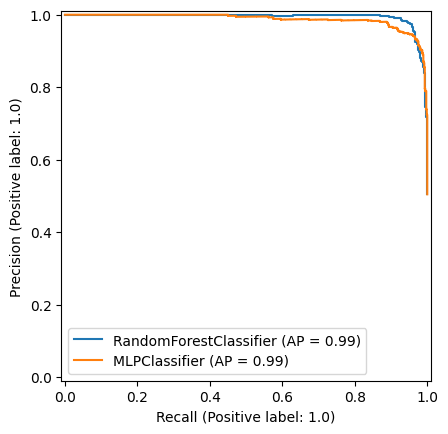

In [93]:
#Plot the Precision-Recall curve

from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
ax=plt.gca()
rf_pr_display = PrecisionRecallDisplay.from_estimator(clf_rf, X_test, y_test, ax=ax)
nn_pr_display = PrecisionRecallDisplay.from_estimator(clf_nn, X_test, y_test, ax=ax)



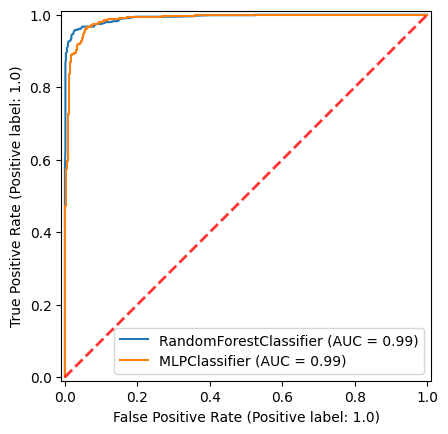

In [94]:
##Plot the ROC curve
from sklearn.metrics import RocCurveDisplay

ax=plt.gca()
rf_disp=RocCurveDisplay.from_estimator(clf_rf, X_test, y_test, ax=ax)
nn_disp=RocCurveDisplay.from_estimator(clf_nn, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)